In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 


train_dir = "Data/dataset/training_set"
test_dir  = "Data/dataset/test_set"

# Generator
train_gen = ImageDataGenerator(rescale=1./255)
test_gen  = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(64,64),
    batch_size=8,
    class_mode='binary'
)

# Model – Dùng trực tiếp Conv2D
model = Sequential([
    Conv2D(16, 3, activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, epochs=7, validation_data=test_data)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/7


d:\CGA\miniconda\minicondaExtracted\envs\chatbot_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5189 - loss: 0.6911 - val_accuracy: 0.5085 - val_loss: 0.6924
Epoch 2/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5899 - loss: 0.6687 - val_accuracy: 0.6500 - val_loss: 0.6331
Epoch 3/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6659 - loss: 0.6214 - val_accuracy: 0.7100 - val_loss: 0.5722
Epoch 4/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7096 - loss: 0.5680 - val_accuracy: 0.7300 - val_loss: 0.5385
Epoch 5/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7501 - loss: 0.5228 - val_accuracy: 0.7570 - val_loss: 0.5156
Epoch 6/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7763 - loss: 0.4702 - val_accuracy: 0.7745 - val_loss: 0.4850
Epoch 7/7
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7916 - loss: 0.4447 - val_accuracy: 0.7735 - val_loss: 0.4874


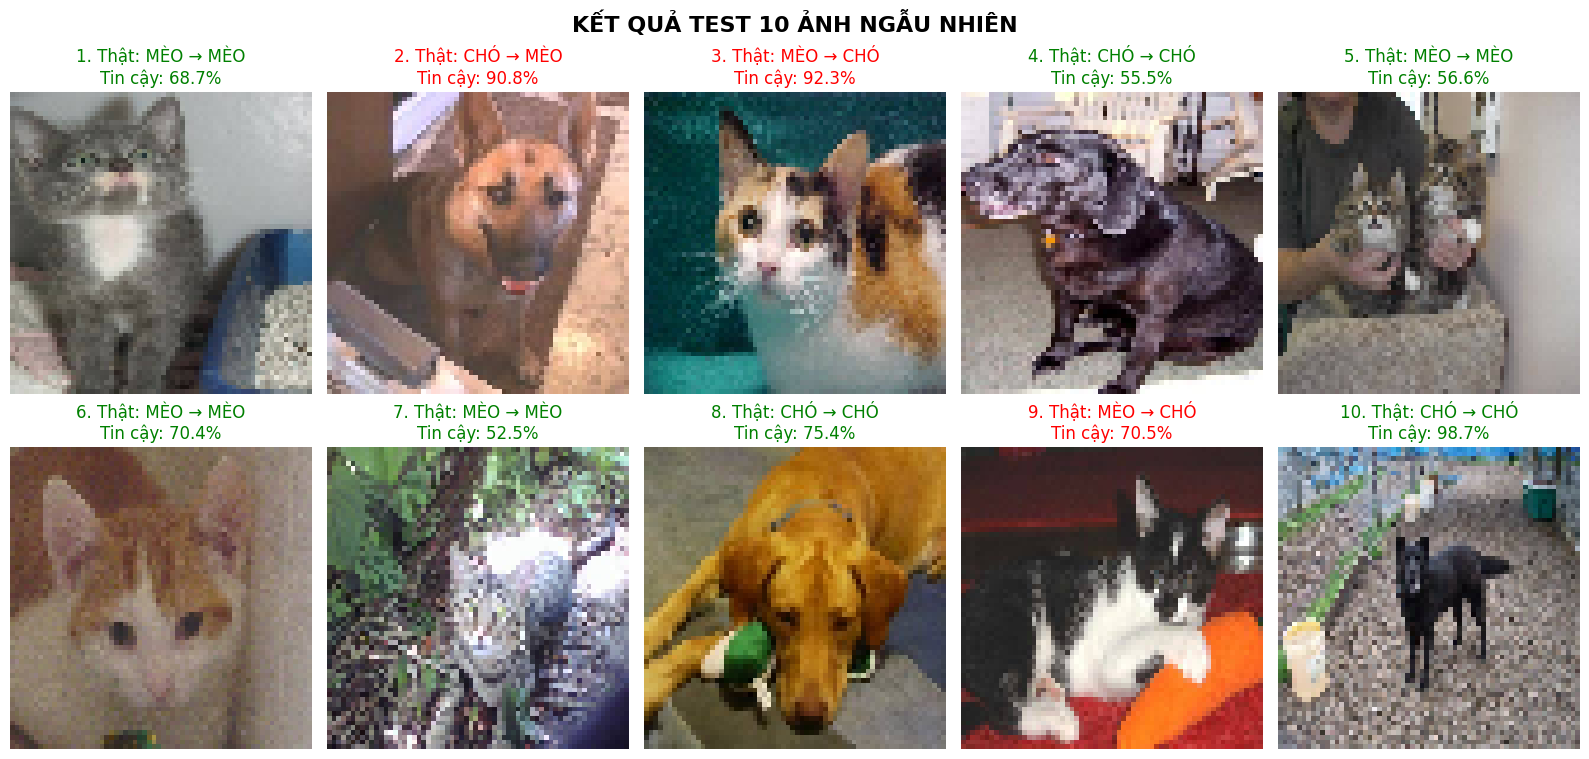


Kết quả cuối cùng: 7/10 đúng → 70.0%


In [ ]:
# TEST 10 ẢNH NGẪU NHIÊN 
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_cat_dir = "Data/dataset/test_set/cats"
test_dog_dir = "Data/dataset/test_set/dogs"  

cat_files = os.listdir(test_cat_dir)
dog_files = os.listdir(test_dog_dir)         

correct = 0
total = 10

plt.figure(figsize=(16, 8))

for i in range(total):
    if random.choice([0,1]) == 0:
        file = random.choice(cat_files)
        true = "MÈO"
        path = os.path.join(test_cat_dir, file)
    else:
        file = random.choice(dog_files)
        true = "CHÓ"
        path = os.path.join(test_dog_dir, file)
    
    # QUAN TRỌNG: phải là (64,64) vì model train với 64x64
    img = image.load_img(path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0
    
    pred = model.predict(x, verbose=0)[0][0]
    pred_label = "CHÓ" if pred > 0.5 else "MÈO"
    confidence = pred if pred > 0.5 else 1-pred
    
    if pred_label == true:
        correct += 1
        color = 'green'
    else:
        color = 'red'
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"{i+1}. Thật: {true} → {pred_label}\nTin cậy: {confidence:.1%}".format(confidence),
              color=color, fontsize=12)
    plt.axis('off')

plt.suptitle('KẾT QUẢ TEST 10 ẢNH NGẪU NHIÊN', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nKết quả cuối cùng: {correct}/{total} đúng → {correct/total*100:.1f}%")